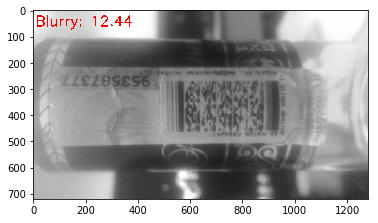

In [1]:
# import the necessary packages
from imutils import paths
import argparse
import cv2

import os, os.path

from tqdm import tqdm

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
 
def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv2.Laplacian(image, cv2.CV_64F).var()
 

image = cv2.imread('test_data/final720/photo1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fm = variance_of_laplacian(gray)
text = "Not Blurry"

# if the focus measure is less than the supplied threshold,
# then the image should be considered "blurry"
if fm < 100:
    text = "Blurry"

# show the image
cv2.putText(image, "{}: {:.2f}".format(text, fm), (10, 60),
    cv2.FONT_HERSHEY_SIMPLEX, 1.8, (0, 0, 255), 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## A little bit of theory

http://optica.csic.es/papers/icpr2k.pdf

## Try test on dataset

100%|██████████| 74/74 [00:40<00:00,  1.84it/s]


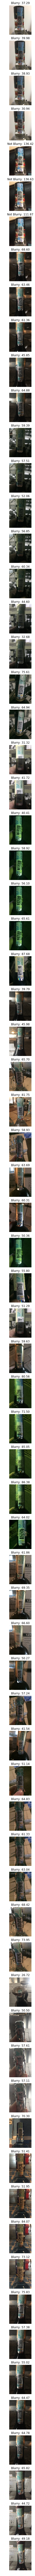

In [22]:
def clear(image, fig):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = cv2.Laplacian(gray, cv2.CV_64F).var()
    text = "Not Blurry"

    # if the focus measure is less than the supplied threshold,
    # then the image should be considered "blurry"
    if fm < 100:
        text = "Blurry"
    
    a = fig.add_subplot(filescount, 1, current_file_index + 1)
    imgplot = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    a.set_title("{}: {:.2f}".format(text, fm))
    a.axis('off')

DIR = 'test_data/premasked'
filescount = len([name for name in os.listdir(DIR) if (name.endswith(".JPG") or name.endswith(".jpg"))])
current_file_index = 0
fig = plt.figure(figsize=(5, 200))

for filename in tqdm(os.listdir(DIR)):
    if not (filename.endswith(".JPG") or filename.endswith(".jpg")):
        continue
        
    file_src = cv2.imread(os.path.join(DIR, filename))
    clear(file_src, fig)
    current_file_index += 1
    
plt.show()

## Once again, global processing showed its inconsistency

### Try middle third part

100%|██████████| 74/74 [00:23<00:00,  2.77it/s]


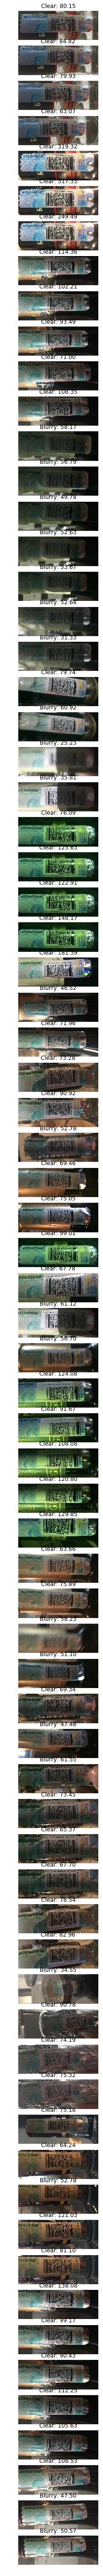

In [2]:
def clear(image, fig, threshold):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = cv2.Laplacian(gray, cv2.CV_64F).var()
    text = "Clear"

    # if the focus measure is less than the supplied threshold,
    # then the image should be considered "blurry"
    if fm < threshold:
        text = "Blurry"
    
    a = fig.add_subplot(filescount, 1, current_file_index + 1)
    imgplot = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    a.set_title("{}: {:.2f}".format(text, fm))
    a.axis('off')

DIR = 'test_data/premasked'
filescount = len([name for name in os.listdir(DIR) if (name.endswith(".JPG") or name.endswith(".jpg"))])
current_file_index = 0
fig = plt.figure(figsize=(10, 100))

for filename in tqdm(os.listdir(DIR)):
    if not (filename.endswith(".JPG") or filename.endswith(".jpg")):
        continue
        
    file_src = cv2.flip(cv2.transpose(cv2.imread(os.path.join(DIR, filename))[160:160+2812, 616:616+1028]), 0)
    clear(file_src, fig, 62)
    current_file_index += 1
    
plt.show()

100%|██████████| 21/21 [00:02<00:00,  7.67it/s]


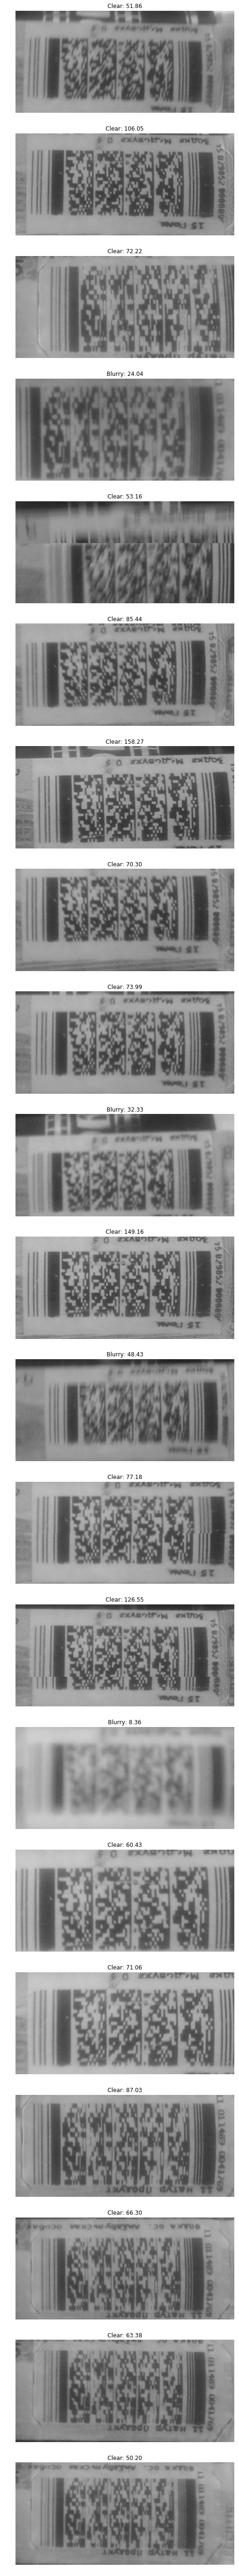

In [3]:
DIR = 'test_data/maskedFinal720'
filescount = len([name for name in os.listdir(DIR) if (name.endswith(".PNG") or name.endswith(".png"))])
current_file_index = 0
fig = plt.figure(figsize=(10, 100))

for filename in tqdm(os.listdir(DIR)):
    if not (filename.endswith(".PNG") or filename.endswith(".png")):
        continue
        
    file_src = cv2.imread(os.path.join(DIR, filename))[252:252+216, 523:523+462]
    clear(file_src, fig, 50)
    current_file_index += 1
    
plt.show()